## Predicting High Risk Pregnancy

### Contex:
This dataset contains antenatal and clinical information from pregnant women, aiming to assess and predict high-risk pregnancies. Each record represents an individual expectant mother with demographic, physiological, and diagnostic details collected during prenatal visits.

The data captures important maternal and fetal parameters such as age, gestational age, blood pressure, weight, anemia, fetal movement, fetal heart rate, and laboratory test results (urine tests, VDRL, and HBsAg).

The core objective is to use these features to predict whether a pregnancy is high-risk or not, supporting early medical interventions and improved maternal–fetal health outcomes.

**Key Elements**
- **Type of study**: Maternal health / Antenatal risk classification
- **Data type**: Tabular (structured data, mix of categorical and numerical features)
- **Prediction type**: Binary classification
- **Target variable**: High-Risk Pregnancy (Yes / No)
- **Use case**: Decision support system for healthcare workers to identify high-risk cases early

### Goal
To develop a predictive model that uses features such as age, gestational age, blood pressure, weight, urine test results, and clinical indicators (like anemia, jaundice, and VDRL/HRsAG results) to classify pregnancies as either:
- High-Risk Pregnancy (Yes), or
- Normal/Low-Risk Pregnancy (No)

### Purpose of the Prediction
- Early detection of high-risk pregnancies to enable timely medical interventions.
- Support clinical decision-making for maternal health workers.
- Reduce maternal and neonatal complications by identifying at-risk individuals.

### Data dictionary:
- Name – Name of the pregnant woman
- Age – Age in years
- Gravida – Number of times the woman has been pregnant (e.g., 1st, 2nd)- TranslationTT Injection – Number or stage of Tetanus Toxoid (TT) injections received
- Gestational Age – Duration of pregnancy in weeks
- Weight – Body weight of the woman (in kilograms)
- Height – Height of the woman (in feet and inches)
- Blood Pressure – Blood pressure reading (mmHg)
- Anemia – Presence or absence of anemia
- Jaundice – Presence or absence of jaundice
- Fetal Position – Position of the fetus (e.g., normal, breech)
- Fetal Movement – Observation of fetal movement (e.g., normal, abnormal)
- Fetal Heart Rate – Fetal heart rate (beats per minute, e.g., 140m)
- Urine Test – Albumin – Result of urine test for albumin (e.g., None, Trace, Positive)
- Urine Test – Sugar – Result of urine test for sugar (e.g., Yes/No)
- VDRL – Syphilis screening test result (e.g., Positive/Negative)
- HRsAG – Hepatitis B surface antigen test result (e.g., Positive/Negative)
- High-Risk Pregnancy – Indicates whether the pregnancy is high-risk (Yes/No)

## Importing Liabraries

In [1]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# Import Label Encoder
from sklearn import preprocessing


# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

## Loading the dataset

In [67]:
import google.colab
google.colab.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Overview

In [68]:
path = "/content/drive/MyDrive/Data Analysis Projects/Maternal Health High Risk Pregnancy/Maternal Health and High-Risk Pregnancy Dataset.csv"
mat_preg = pd.read_csv(path)

In [69]:
# Reading the dataset
mat_preg.head()

,Name,Age,Gravida,TranslationTT Injection,Gestational Age,Weight,Height,Blood Pressure,Anemia,Jaundice,Fetal Position,Fetal Movement,Fetal Heart Rate,Urine Test – Albumin,Urine Test – Sugar,VDRL,HRsAG,High-Risk Pregnancy
0,Rituporna,18,1st,1st,38 week,50 kg,5.3'',100/60,NaN,NaN,Normal,Normal,140m,NaN,Yes,Negative,Negative,Yes
1,Moina,25,2nd,2nd,38 week,60 kg,5.2'',100/70,NaN,NaN,Normal,Normal,130m,NaN,Yes,Positive,Negative,No
2,Rabeya,20,1st,1st,30 week,55 kg,5.0'',100/60,NaN,NaN,Normal,Normal,120m,NaN,Yes,Negative,Negative,Yes
3,Shorna,22,1st,3rd,35 week,51 kg,5.4'',110/65,NaN,NaN,Normal,Normal,130m,NaN,Yes,Positive,Negative,Yes
4,Tania Akter,20,1st,2nd,30 week,53 kg,5.2'',100/55,NaN,NaN,Normal,Normal,125m,NaN,Yes,Negative,Negative,No


In [70]:
#Create a copy of the dataset
MartenalPregnacy = mat_preg.copy()

#### Checking the shape of the dataset

In [71]:
# Shape of the dataset
print("The dataset shape", MartenalPregnacy.shape)

The dataset shape (998, 18)


#### Checking duplicates

In [72]:
# Check for duplicates
dup_T = MartenalPregnacy.duplicated().sum()
print("There are {} duplicates in the dataset".format(dup_T))

There are 0 duplicates in the dataset


#### Check the data types of the columns in the dataset.

In [73]:
MartenalPregnacy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Name                     998 non-null    object
 1   Age                      998 non-null    int64 
 2   Gravida                  998 non-null    object
 3   TranslationTT Injection  998 non-null    object
 4   Gestational Age          998 non-null    object
 5   Weight                   998 non-null    object
 6   Height                   998 non-null    object
 7   Blood Pressure           998 non-null    object
 8   Anemia                   123 non-null    object
 9   Jaundice                 12 non-null     object
 10  Fetal Position           998 non-null    object
 11  Fetal Movement           998 non-null    object
 12  Fetal Heart Rate         998 non-null    object
 13  Urine Test – Albumin     134 non-null    object
 14  Urine Test – Sugar       998 non-null    o

#### Statistical summary

In [74]:
# Check the statistical sumamry
MartenalPregnacy.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,998.000,22.963,3.568,18.000,20.000,22.000,25.000,32.000


**Observations**

- The minimum `Age` is `18` with maximum of  `32` years


In [75]:
# Statistical sumamry for categorical variables
MartenalPregnacy.describe(include="object").T

,count,unique,top,freq
Name,998,350,Runa,18
Gravida,998,3,1st,837
TranslationTT Injection,998,3,2nd,457
Gestational Age,998,11,30 week,244
Weight,998,14,60 kg,105
Height,998,7,5.3'',231
Blood Pressure,998,11,100/60,202
Anemia,123,2,Minimal,62
Jaundice,12,2,Minimal,8
Fetal Position,998,2,Normal,992


#### Check for missing values

In [76]:
#Missing valaues in the dataset
MartenalPregnacy.isna().sum()

,0
Name,0
Age,0
Gravida,0
TranslationTT Injection,0
Gestational Age,0
Weight,0
Height,0
Blood Pressure,0
Anemia,875
Jaundice,986


**Treating missing values**

In [77]:
# identify the numeric and categrical columns
'''
For the following features, None, is not a missing vaue, it indicates that there
was no detection.

We will renames the features values as below.
Anemia:  None : No Anemia Detected
Jaundice: None : No Jaundice Detected
Urine Test- Albumin: None : No Albumin Detected

'''

#Columns to fill NAN with Nornal
col_r = ['Anemia', 'Jaundice', 'Urine Test – Albumin']
MartenalPregnacy[col_r] = MartenalPregnacy[col_r].fillna('Normal')

In [78]:
#Check any other missing values
MartenalPregnacy.isna().sum()

,0
Name,0
Age,0
Gravida,0
TranslationTT Injection,0
Gestational Age,0
Weight,0
Height,0
Blood Pressure,0
Anemia,0
Jaundice,0


In [80]:
MaternalP =MartenalPregnacy.copy()

#### Define BP Rates

In [82]:
def categorize_bp(bp):
    try:
        if pd.isna(bp):
            return np.nan

        # Extract systolic and diastolic values
        systolic, diastolic = map(int, bp.split('/'))

        # Categorize using standard ranges
        if systolic < 90 or diastolic < 60:
            return 'Low BP (Hypotension)'
        elif 90 <= systolic <= 119 and 60 <= diastolic <= 79:
            return 'Normal BP'
        elif 120 <= systolic <= 129 and diastolic < 80:
            return 'Elevated (Pre-hypertension)'
        elif 130 <= systolic <= 139 or 80 <= diastolic <= 89:
            return 'High BP (Hypertension Stage 1)'
        elif systolic >= 140 or diastolic >= 90:
            return 'High BP (Hypertension Stage 2)'
        else:
            return 'Normal BP'
    except:
        return np.nan

# Apply categorization
MaternalP['BP Rate'] = MaternalP['Blood Pressure'].apply(categorize_bp)

**Define Feutal Heart Rate  Categories**

In [85]:
# Clean and convert values
MaternalP['Fetal Heart Rate'] = MaternalP['Fetal Heart Rate'].str.replace('m', '', regex=False).astype(float) # This line is no longer needed as the column is already numeric
def categorize_fhr(fhr):
    try:
        if pd.isna(fhr):
            return np.nan

        fhr = float(fhr)

        if fhr < 110:
            return 'Low FHR (Bradycardia)'
        elif 110 <= fhr <= 160:
            return 'Normal FHR'
        elif fhr > 160:
            return 'High FHR (Tachycardia)'
        else:
            return np.nan
    except:
        return np.nan

# Apply categorization
MaternalP['FHR Rate'] = MaternalP['Fetal Heart Rate'].apply(categorize_fhr)

In [86]:
MaternalP.head()

,Name,Age,Gravida,TranslationTT Injection,Gestational Age,Weight,Height,Blood Pressure,Anemia,Jaundice,Fetal Position,Fetal Movement,Fetal Heart Rate,Urine Test – Albumin,Urine Test – Sugar,VDRL,HRsAG,High-Risk Pregnancy,BP Rate,FHR Rate
0,Rituporna,18,1st,1st,38 week,50 kg,5.3'',100/60,Normal,Normal,Normal,Normal,140.000,Normal,Yes,Negative,Negative,Yes,Normal BP,Normal FHR
1,Moina,25,2nd,2nd,38 week,60 kg,5.2'',100/70,Normal,Normal,Normal,Normal,130.000,Normal,Yes,Positive,Negative,No,Normal BP,Normal FHR
2,Rabeya,20,1st,1st,30 week,55 kg,5.0'',100/60,Normal,Normal,Normal,Normal,120.000,Normal,Yes,Negative,Negative,Yes,Normal BP,Normal FHR
3,Shorna,22,1st,3rd,35 week,51 kg,5.4'',110/65,Normal,Normal,Normal,Normal,130.000,Normal,Yes,Positive,Negative,Yes,Normal BP,Normal FHR
4,Tania Akter,20,1st,2nd,30 week,53 kg,5.2'',100/55,Normal,Normal,Normal,Normal,125.000,Normal,Yes,Negative,Negative,No,Low BP (Hypotension),Normal FHR


#### Save the dataset

In [113]:
#Save the clean dataset
MartenalPreg_clean = MartenalPregnacy.copy()
MartenalPreg_clean.to_csv("/content/drive/MyDrive/Data Analysis Projects/Maternal Health High Risk Pregnancy/Martenal_Preg_clean.csv", index=False)

### Exploratory Data Analysis

In [34]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [36]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [96]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [37]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

##### Univariate Analysis

**Gravida**

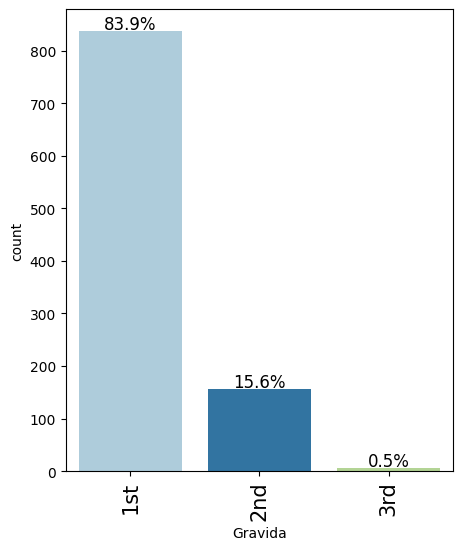

In [51]:
# Gravida Bar Plot
labeled_barplot(MartenalPregnacy, "Gravida", perc = True)

**Observation**
- `~84%` of the the women have never been pregnant prior to this pregnancy
- Only `0.5%` of the women have been pregnant more than once before the current pregnancy

**Observations on TranslationTT Injection**

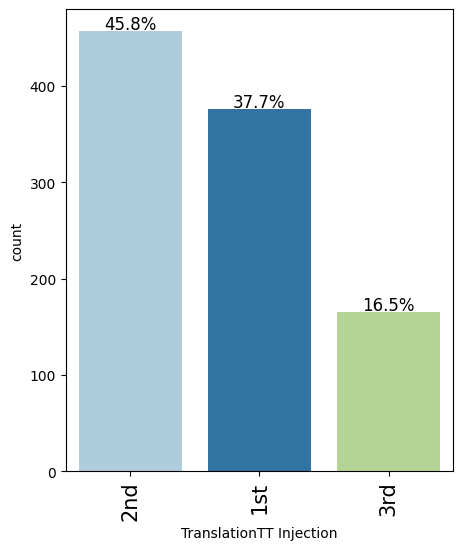

In [53]:
# TranslationTT Injection Bar Plot
labeled_barplot(MartenalPregnacy, "TranslationTT Injection", perc = True)

**Observations**
- `~38%` of the pregant wome have not been given any TT Injection

**Observations on BP Rates**

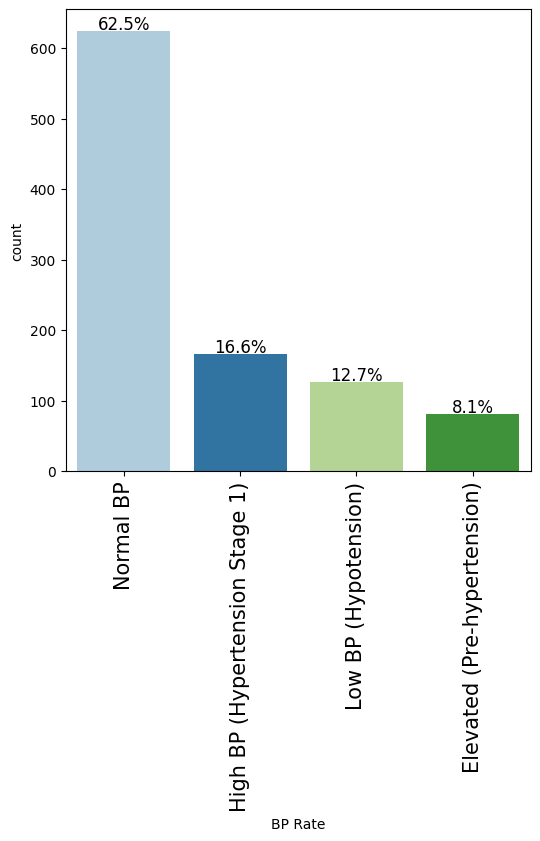

In [63]:
# BP Rates
labeled_barplot(MartenalPregnacy, "BP Rate", perc = True)

- Majority `62.5%` of the sample women have normal BP, with `~16%` with High BP (Hypertension Stage 1)

**Obseravtions on Fetal Heart Rate**

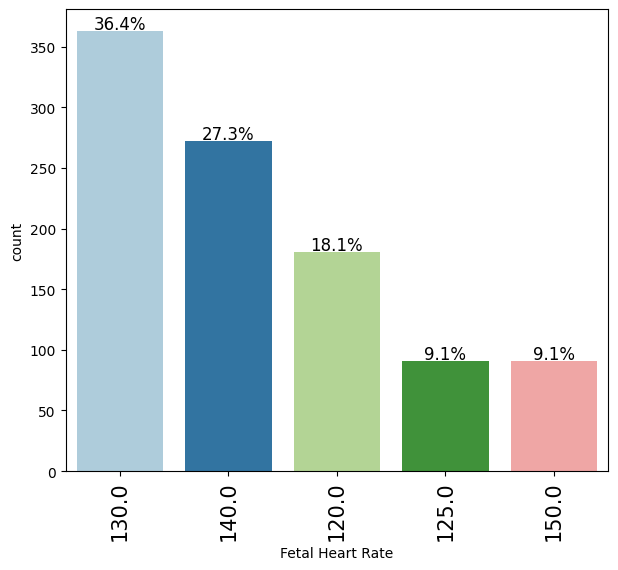

In [66]:
# FHR
labeled_barplot(MartenalPregnacy, "Fetal Heart Rate", perc = True)

- The data shows normal futal cardiac activities, with majority between 120m - 130m

**Obseravtions on Fetal Position**

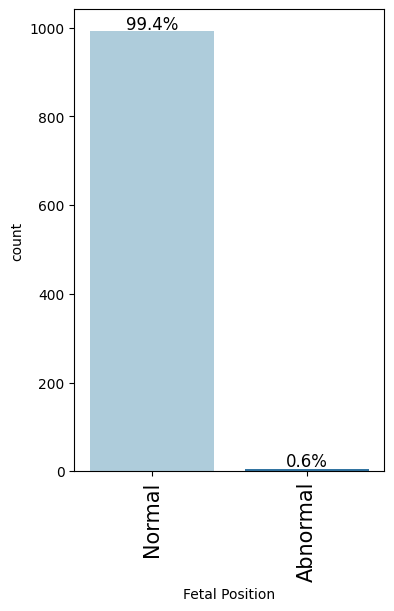

In [91]:
labeled_barplot(MartenalPregnacy, "Fetal Position", perc = True)

- `99%` of the fetals are in normal position

**Observations on Anemia**

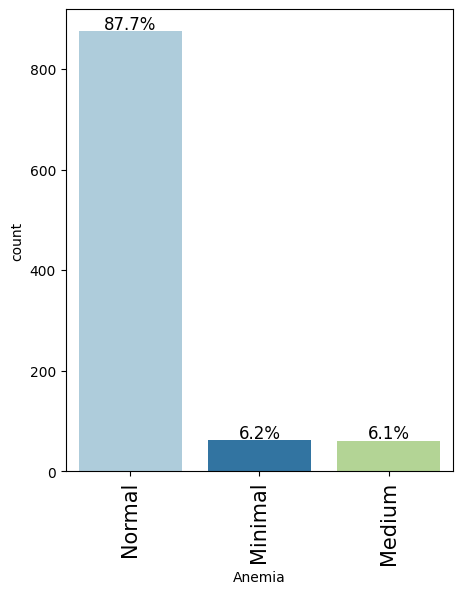

In [92]:
labeled_barplot(MartenalPregnacy, "Anemia", perc = True)

- Medium and minimal anemia experienced among the women

**Observations on HRsAG**

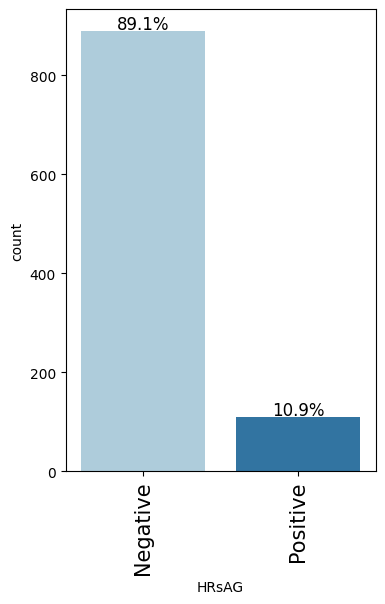

In [93]:
labeled_barplot(MartenalPregnacy, "HRsAG", perc = True)

- `10.9%` of the women have Active Hepatitis B infection

**Observations on VDRL**

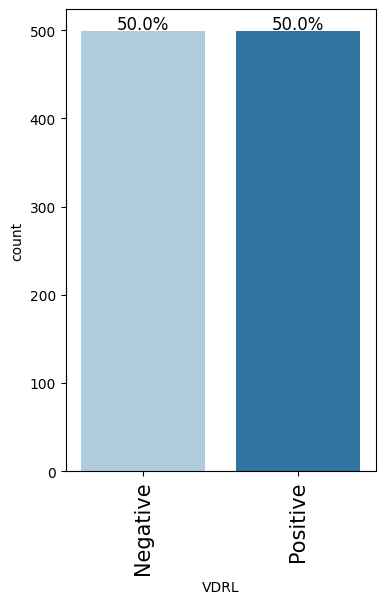

In [94]:
labeled_barplot(MartenalPregnacy, "VDRL", perc = True)

- Antibodies detected → Possible syphilis infection in `50%` of the women

**Observations on Jaundice**

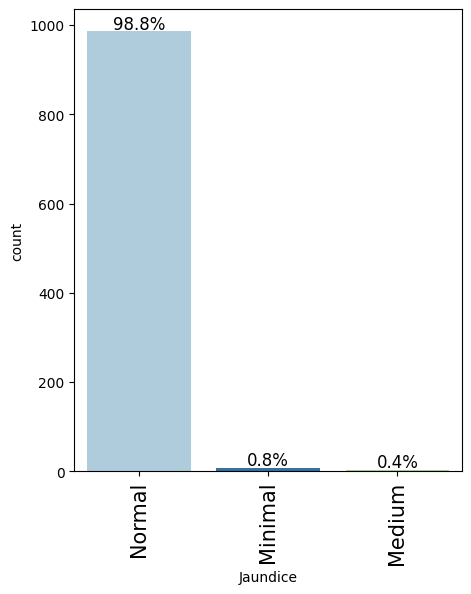

In [95]:
labeled_barplot(MartenalPregnacy, "Jaundice", perc = True)

-  `~ 1%` of the women show signs of liver dysfunction or infection

##### Bivariate Analysis

High-Risk Pregnancy   No  Yes  All
HRsAG                             
Negative             332  557  889
All                  332  666  998
Positive               0  109  109
------------------------------------------------------------------------------------------------------------------------


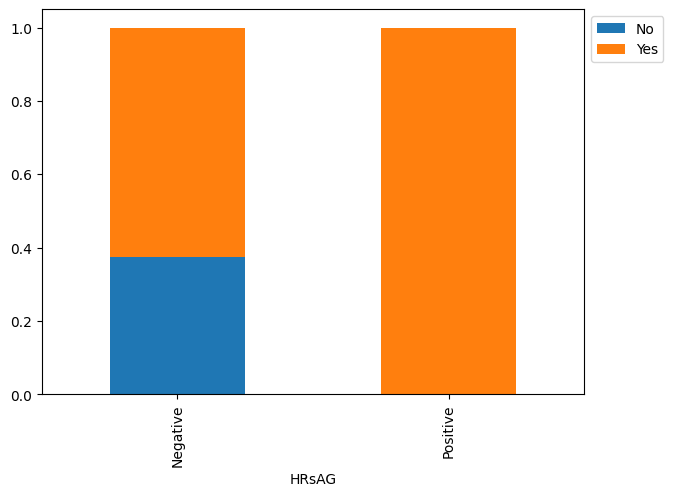

In [101]:
stacked_barplot(MartenalPregnacy, "HRsAG", "High-Risk Pregnancy")

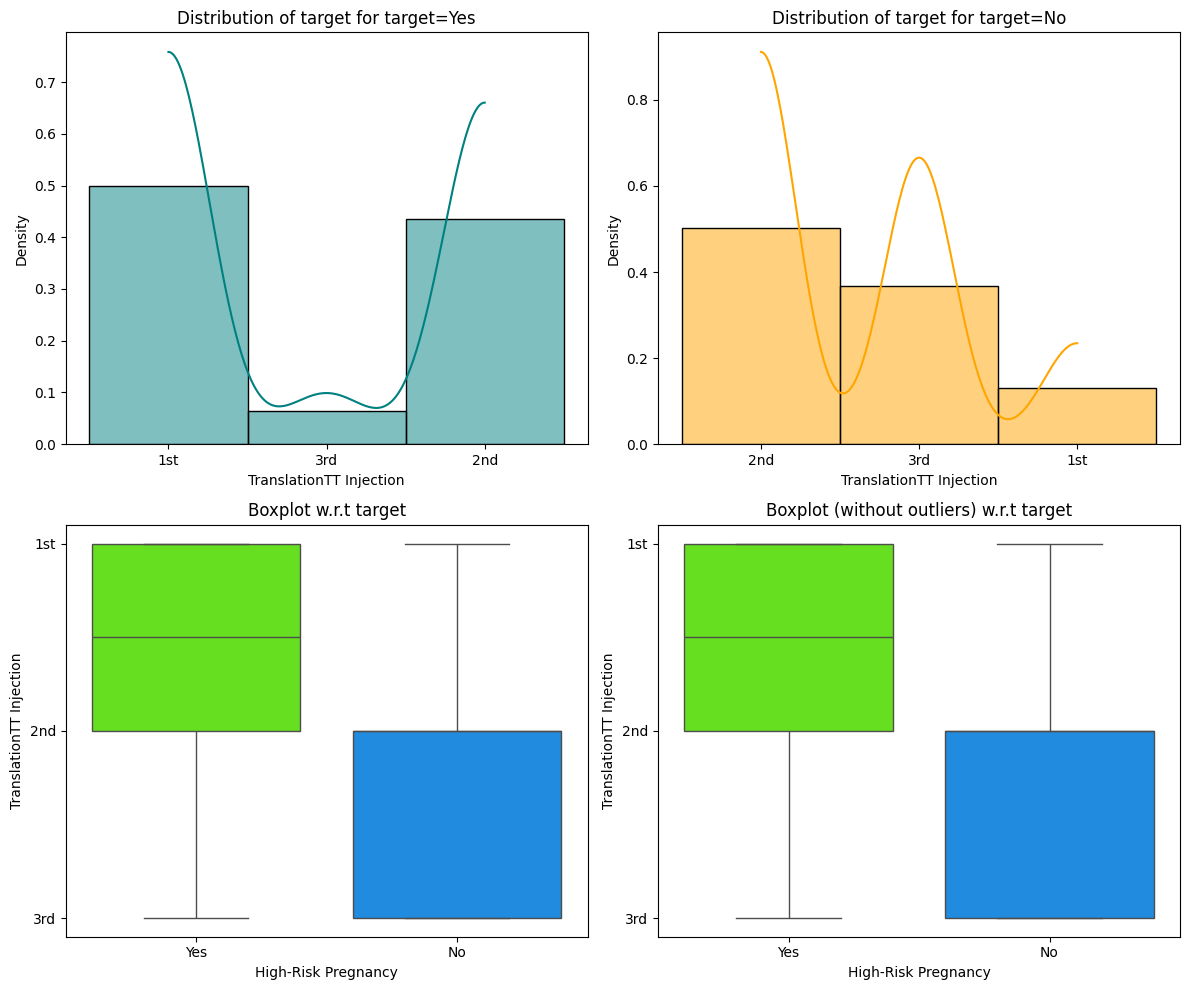

In [98]:
distribution_plot_wrt_target(MartenalPregnacy, "TranslationTT Injection", "High-Risk Pregnancy")

### Data Preparation for modelling

In [122]:
#Create a copy dataset copy
MartenalPreg = MartenalPregnacy.copy()
#Drop the name column
MartenalPreg.drop(["Name", 'Fetal Movement'], axis=1, inplace=True)

In [115]:
# # drop the case_status form the main dataset
# X = MartenalPreg.drop(["High-Risk Pregnancy"], axis=1)
# y  = MartenalPreg["High-Risk Pregnancy"]

# # Splitting data in train and test sets
# X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
# print(X_train.shape, X_test.shape)

(698, 15) (300, 15)


In [116]:
# # splitting train datasets into training and validation sets
# X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

# # Display of the dataset a
# print("Shape of Training set : ", X_t.shape)
# print("Shape of validation set : ", X_val.shape)
# print("Percentage of classes in training set:")
# print(y_train.value_counts(normalize=True))
# print("Percentage of classes in validation set:")
# print(y_val.value_counts(normalize=True))

Shape of Training set :  (488, 15)
Shape of validation set :  (210, 15)
Percentage of classes in training set:
High-Risk Pregnancy
Yes   0.668
No    0.332
Name: proportion, dtype: float64
Percentage of classes in validation set:
High-Risk Pregnancy
Yes   0.667
No    0.333
Name: proportion, dtype: float64


#### Using Clasfier Technique to determine variables with effective colleration

In [118]:
# # Determine features correlations
# classifier = SelectKBest(score_func=f_classif, k=5)
# fits = classifier.fit(MartenalPreg.drop("High-Risk Pregnancy", axis=1), MartenalPreg["High-Risk Pregnancy"])
# x1 = pd.DataFrame(fits.scores_)
# columns = pd.DataFrame(MartenalPreg.drop("High-Risk Pregnancy", axis=1).columns)
# fscores = pd.concat([columns, x1], axis=1)
# fscores.columns = ["Attribute", "Score"]
# fscores.sort_values(by="Score", ascending=False)

### Model Building

In [130]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #, DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pickle

# ==========================================
# 1️⃣ Load Data
# ==========================================
df = MartenalPreg.copy()
# drop the case_status form the main dataset
X = df.drop(["High-Risk Pregnancy"], axis=1)
y  = df["High-Risk Pregnancy"]

# Clean 'Fetal Heart Rate' column
X['Fetal Heart Rate'] = X['Fetal Heart Rate'].astype(str).str.replace('m', '', regex=False)
X['Fetal Heart Rate'] = pd.to_numeric(X['Fetal Heart Rate'])


# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)


# Identify numeric and categorical features
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

# ==========================================
# 2️⃣ Preprocessing
# ==========================================
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

# ==========================================
# 3️⃣ Base Models (No Hyperparameter Tuning Yet)
# ==========================================
models = {
    "LogisticRegression": LogisticRegression(max_iter=2000),
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "SVC": SVC(probability=True)
}

# ==========================================
# 4️⃣ Train-Test Split
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ==========================================
# 5️⃣ Evaluate All Models
# ==========================================
results = []
best_model = None
best_name = ""
best_auc = 0

for name, model in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]

    roc = roc_auc_score(y_test, y_proba)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "ROC-AUC": roc
    })

    if roc > best_auc:
        best_auc = roc
        best_model = model
        best_name = name

results_df = pd.DataFrame(results)
print("\n📊 Base Model Results:")
print(results_df.sort_values(by="ROC-AUC", ascending=False))

print(f"\n🏆 Best Base Model: {best_name} (ROC-AUC = {best_auc:.4f})")

# ==========================================
# 6️⃣ Define Parameter Grid for Best Model Only
# ==========================================
param_grids = {
    "LogisticRegression": {
        "classifier__C": [0.1, 1, 10],
        "classifier__solver": ["lbfgs", "liblinear"]
    },
    "RandomForest": {
        "classifier__n_estimators": [100, 200, 300],
        "classifier__max_depth": [5, 10, None],
        "classifier__min_samples_split": [2, 5]
    },
    "GradientBoosting": {
        "classifier__n_estimators": [100, 200],
        "classifier__learning_rate": [0.05, 0.1, 0.2],
        "classifier__max_depth": [3, 5]
    },
    "SVC": {
        "classifier__C": [0.1, 1, 10],
        "classifier__kernel": ["linear", "rbf"]
    }
}

# Ensure the best model is one that has a defined parameter grid
if best_name not in param_grids:
    print(f"\n⚠️ No parameter grid defined for the best model ({best_name}). Skipping hyperparameter tuning.")
else:
    param_grid = param_grids[best_name]

    # ==========================================
    # 7️⃣ Grid Search for the Best Model
    # ==========================================
    print(f"\n🔍 Performing GridSearchCV on {best_name}...")

    pipe_best = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", best_model)
    ])

    grid = GridSearchCV(
        estimator=pipe_best,
        param_grid=param_grid,
        scoring="roc_auc",
        cv=5,
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    # ==========================================
    # 8️⃣ Evaluate Tuned Best Model
    # ==========================================
    y_pred = grid.predict(X_test)
    y_proba = grid.predict_proba(X_test)[:, 1]

    print("\n📈 Tuned Model Evaluation:")
    print(f"Best Params: {grid.best_params_}")

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc = roc_auc_score(y_test, y_proba)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc:.4f}")
    print("\nDetailed Report:\n", classification_report(y_test, y_pred))

    # ==========================================
    # 9️⃣ Save Tuned Model
    # ==========================================
    save_path = "/content/drive/MyDrive/Data Analysis Projects/Maternal Health High Risk Pregnancy/best_tuned_model.pkl"

    with open(save_path, "wb") as f:
        pickle.dump(grid.best_estimator_, f)

    print(f"\n✅ Tuned {best_name} model saved successfully at:\n{save_path}")


📊 Base Model Results:
                Model  Accuracy  Precision  Recall    F1  ROC-AUC
1        RandomForest     0.980      0.985   0.985 0.985    0.999
3    GradientBoosting     0.955      0.977   0.955 0.966    0.995
4                 SVC     0.920      0.921   0.962 0.941    0.988
2        DecisionTree     0.985      0.992   0.985 0.989    0.985
0  LogisticRegression     0.930      0.947   0.947 0.947    0.979

🏆 Best Base Model: RandomForest (ROC-AUC = 0.9987)

🔍 Performing GridSearchCV on RandomForest...

📈 Tuned Model Evaluation:
Best Params: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Accuracy: 0.9800
Precision: 0.9850
Recall: 0.9850
F1-Score: 0.9850
ROC-AUC: 0.9985

Detailed Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.98      0.98      0.98       133

    accuracy                           0.98       200
   macro avg       0.9

### Complete Sample 2 Model Pipeline

Loading data...
Numeric features : ['Age', 'Fetal Heart Rate']
Categorical features : ['Gravida', 'TranslationTT Injection', 'Gestational Age', 'Weight', 'Height', 'Blood Pressure', 'Anemia', 'Jaundice', 'Fetal Position', 'Urine Test – Albumin', 'Urine Test – Sugar', 'VDRL', 'HRsAG']
Target distribution : [332 666] (0=Low, 1=High)
Train: (638, 15) | Val: (160, 15) | Test: (200, 15)

Evaluating base models (5‑fold CV + SMOTE)...
             Model  CV ROC‑AUC   Std
      RandomForest       0.996 0.002
  GradientBoosting       0.986 0.007
               SVC       0.984 0.007
LogisticRegression       0.975 0.009
      DecisionTree       0.974 0.016

Best base model: RandomForest (CV ROC‑AUC = 0.9961)

GridSearchCV on RandomForest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params: {'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 300}

VALIDATION SET
Accuracy : 0.9875
Precision: 1.0000
Recall   : 0.9813
F1‑Score : 0.9906
ROC‑AUC  : 1.0000


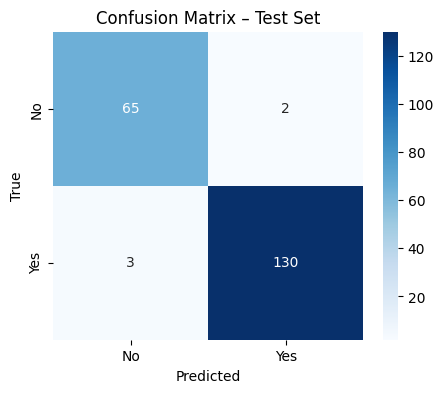


Generating SHAP summary...

Model, preprocessor, and metadata saved → /content/drive/MyDrive/Data Analysis Projects/Maternal Health High Risk Pregnancy/final_maternal_model_v2.pkl
Pipeline completed successfully!


In [129]:
# ==========================================
# MATERNAL HEALTH RISK PREDICTION – FULL PIPELINE (FIXED)
# ==========================================
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

import shap
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------------
# 1. Load & Clean Data
# -------------------------------------------------
print("Loading data...")
df = MartenalPreg.copy()                     # <-- fixed copy bug

# Target
y_raw = df["High-Risk Pregnancy"]
le = LabelEncoder()
y = le.fit_transform(y_raw)                  # 0=Low, 1=High

# Features
X = df.drop(columns=["High-Risk Pregnancy"])

# Clean Fetal Heart Rate (remove stray 'm')
X['Fetal Heart Rate'] = (
    X['Fetal Heart Rate']
    .astype(str)
    .str.replace('m', '', regex=False)
    .pipe(pd.to_numeric, errors='coerce')
)

# Explicit column lists
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

print(f"Numeric features : {num_features}")
print(f"Categorical features : {cat_features}")
print(f"Target distribution : {np.bincount(y)} (0=Low, 1=High)")

# -------------------------------------------------
# 2. Robust Preprocessor (handles missing values)
# -------------------------------------------------
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    # FIXED: use sparse_output (new scikit‑learn) or drop it (default=False)
    ('onehot',  OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer,   num_features),
        ('cat', categorical_transformer, cat_features)
    ],
    remainder='passthrough'
)

# -------------------------------------------------
# 3. Train‑Val‑Test Split (nested‑CV style)
# -------------------------------------------------
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.20, stratify=y_train_val, random_state=42
)

print(f"Train: {X_train.shape} | Val: {X_val.shape} | Test: {X_test.shape}")

# -------------------------------------------------
# 4. Base Models – 5‑fold CV with SMOTE
# -------------------------------------------------
models = {
    "LogisticRegression": LogisticRegression(max_iter=2000, class_weight='balanced'),
    "RandomForest":       RandomForestClassifier(class_weight='balanced', random_state=42),
    "DecisionTree":       DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "GradientBoosting":   GradientBoostingClassifier(random_state=42),
    "SVC":                SVC(probability=True, class_weight='balanced')
}

results = []
best_name = ""
best_cv_auc = 0
best_model = None

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\nEvaluating base models (5‑fold CV + SMOTE)...")
for name, model in models.items():
    pipe = ImbPipeline([
        ('prep',   preprocessor),
        ('smote',  SMOTE(random_state=42)),
        ('clf',    model)
    ])

    auc_scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='roc_auc')
    mean_auc = auc_scores.mean()

    results.append({
        "Model": name,
        "CV ROC‑AUC": round(mean_auc, 4),
        "Std": round(auc_scores.std(), 4)
    })

    if mean_auc > best_cv_auc:
        best_cv_auc = mean_auc
        best_model = model
        best_name = name

results_df = pd.DataFrame(results).sort_values("CV ROC‑AUC", ascending=False)
print(results_df.to_string(index=False))
print(f"\nBest base model: {best_name} (CV ROC‑AUC = {best_cv_auc:.4f})")

# -------------------------------------------------
# 5. Hyperparameter Tuning (only best model)
# -------------------------------------------------
param_grids = {
    "LogisticRegression": {
        "clf__C": [0.1, 1, 10],
        "clf__solver": ["lbfgs", "liblinear"]
    },
    "RandomForest": {
        "clf__n_estimators": [200, 300],
        "clf__max_depth": [5, 10, None],
        "clf__min_samples_split": [2, 5]
    },
    "GradientBoosting": {
        "clf__n_estimators": [100, 200],
        "clf__learning_rate": [0.05, 0.1],
        "clf__max_depth": [3, 5]
    },
    "SVC": {
        "clf__C": [0.1, 1, 10],
        "clf__kernel": ["rbf"]
    }
}

if best_name not in param_grids:
    print(f"No grid for {best_name} → using defaults.")
    final_pipe = ImbPipeline([
        ('prep',   preprocessor),
        ('smote',  SMOTE(random_state=42)),
        ('clf',    best_model)
    ])
    final_pipe.fit(X_train, y_train)
else:
    print(f"\nGridSearchCV on {best_name}...")
    grid_pipe = ImbPipeline([
        ('prep',   preprocessor),
        ('smote',  SMOTE(random_state=42)),
        ('clf',    best_model)
    ])

    grid = GridSearchCV(
        estimator=grid_pipe,
        param_grid=param_grids[best_name],
        scoring='roc_auc',
        cv=cv,
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)
    final_pipe = grid.best_estimator_
    print(f"Best params: {grid.best_params_}")

# -------------------------------------------------
# 6. Validation Set Performance
# -------------------------------------------------
y_val_pred  = final_pipe.predict(X_val)
y_val_proba = final_pipe.predict_proba(X_val)[:, 1]

print("\nVALIDATION SET")
print(f"Accuracy : {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred):.4f}")
print(f"Recall   : {recall_score(y_val, y_val_pred):.4f}")
print(f"F1‑Score : {f1_score(y_val, y_val_pred):.4f}")
print(f"ROC‑AUC  : {roc_auc_score(y_val, y_val_proba):.4f}")
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

# -------------------------------------------------
# 7. FINAL TEST SET (never seen before)
# -------------------------------------------------
y_test_pred  = final_pipe.predict(X_test)
y_test_proba = final_pipe.predict_proba(X_test)[:, 1]

print("\nTEST SET (Hold‑out)")
print(f"Accuracy : {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall   : {recall_score(y_test, y_test_pred):.4f}")
print(f"F1‑Score : {f1_score(y_test, y_test_pred):.4f}")
print(f"ROC‑AUC  : {roc_auc_score(y_test, y_test_proba):.4f}")
print("\nFinal Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix – Test Set")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()

# -------------------------------------------------
# 8. SHAP Explainability (CORRECTED & ROBUST)
# -------------------------------------------------
print("\nGenerating SHAP summary...")

# Fit preprocessor on TRAIN only
preprocessor.fit(X_train)
X_test_prep = preprocessor.transform(X_test)

# Build feature names
ohe = preprocessor.named_transformers_['cat']['onehot']
cat_names = ohe.get_feature_names_out(cat_features).tolist()
all_feature_names = num_features + cat_names

# Extract classifier
clf = final_pipe.named_steps['clf']

# SHAP
if isinstance(clf, (RandomForestClassifier, GradientBoostingClassifier, DecisionTreeClassifier)):
    explainer = shap.TreeExplainer(clf)
    shap_values = explainer.shap_values(X_test_prep)
    if isinstance(shap_values, list):
        shap_values = shap_values[1]  # Positive class
else:
    # Fallback: use smaller sample for KernelExplainer
    print("Using KernelExplainer (slower)...")
    explainer = shap.KernelExplainer(clf.predict_proba, X_test_prep[:50])
    shap_values = explainer.shap_values(X_test_prep[:50])
    X_test_prep = X_test_prep[:50]
    all_feature_names = all_feature_names

# # Plot
# shap.summary_plot(shap_values, X_test_prep, feature_names=all_feature_names, max_display=20)
# plt.title("SHAP: Top Drivers of High-Risk Pregnancy")
# plt.show()

# -------------------------------------------------
# 9. Save Model + Preprocessor + Encoder
# -------------------------------------------------
artifacts = {
    'model': final_pipe,
    'preprocessor': preprocessor,
    'label_encoder': le,
    'num_features': num_features,
    'cat_features': cat_features,
    'feature_names': all_feature_names
}

save_path = "/content/drive/MyDrive/Data Analysis Projects/Maternal Health High Risk Pregnancy/final_maternal_model_v2.pkl"
with open(save_path, 'wb') as f:
    pickle.dump(artifacts, f)

print(f"\nModel, preprocessor, and metadata saved → {save_path}")
print("Pipeline completed successfully!")

### Model Deployment

In [131]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# ==========================================
# 1️⃣ Load the Trained Model
# ==========================================
MODEL_PATH = "/content/drive/MyDrive/Data Analysis Projects/Maternal Health High Risk Pregnancy/best_tuned_model.pkl"

with open(MODEL_PATH, "rb") as f:
    model = pickle.load(f)

st.set_page_config(page_title="Maternal Health High-Risk Pregnancy Prediction", layout="wide")
st.title("🤰 Maternal Health High-Risk Pregnancy Prediction App")

st.write("""
This app uses a machine learning model trained on maternal health data to predict whether a pregnancy
is **High-Risk** or **Normal** based on clinical and physiological parameters.
""")

# ==========================================
# 2️⃣ Collect User Input
# ==========================================
st.subheader("Enter Maternal Health Details")

col1, col2, col3 = st.columns(3)

with col1:
    name = st.text_input("Name")
    age = st.number_input("Age", min_value=10, max_value=60, value=25)
    gravida = st.selectbox("Gravida (Pregnancy Count)", ["1st", "2nd", "3rd", "4th or more"])
    tt_injection = st.selectbox("Tetanus Toxoid Injection", ["1st", "2nd", "None"])
    gestational_age = st.number_input("Gestational Age (weeks)", min_value=4, max_value=42, value=38)
    weight = st.number_input("Weight (kg)", min_value=30.0, max_value=120.0, value=60.0)

with col2:
    height = st.number_input("Height (feet)", min_value=4.0, max_value=6.5, value=5.3)
    blood_pressure = st.text_input("Blood Pressure (e.g., 110/70)", value="100/60")
    anemia = st.selectbox("Anemia", ["Normal", "Mild", "Moderate", "Severe"])
    jaundice = st.selectbox("Jaundice", ["Normal", "Yes"])
    fetal_position = st.selectbox("Fetal Position", ["Normal", "Breech", "Transverse"])
    fetal_movement = st.selectbox("Fetal Movement", ["Normal", "Reduced", "Absent"])

with col3:
    fetal_heart_rate = st.number_input("Fetal Heart Rate (bpm)", min_value=60, max_value=200, value=130)
    urine_albumin = st.selectbox("Urine Test – Albumin", ["Normal", "Higher"])
    urine_sugar = st.selectbox("Urine Test – Sugar", ["Normal", "Yes"])
    vdrl = st.selectbox("VDRL (Syphilis Test)", ["Negative", "Positive"])
    hbsag = st.selectbox("HBsAg (Hepatitis B Test)", ["Negative", "Positive"])

# ==========================================
# 3️⃣ Prepare Input for Model
# ==========================================
if st.button("🔍 Predict Risk"):
    try:
        # Create input dataframe
        input_data = pd.DataFrame({
            "Name": [name],
            "Age": [age],
            "Gravida": [gravida],
            "TranslationTT Injection": [tt_injection],
            "Gestational Age": [f"{gestational_age} week"],
            "Weight": [f"{weight} kg"],
            "Height": [f"{height}''"],
            "Blood Pressure": [blood_pressure],
            "Anemia": [anemia],
            "Jaundice": [jaundice],
            "Fetal Position": [fetal_position],
            "Fetal Movement": [fetal_movement],
            "Fetal Heart Rate": [f"{fetal_heart_rate}m"],
            "Urine Test – Albumin": [urine_albumin],
            "Urine Test – Sugar": [urine_sugar],
            "VDRL": [vdrl],
            "HRsAG": [hbsag]
        })

        # Preprocess Fetal Heart Rate numeric
        input_data["Fetal Heart Rate"] = (
            input_data["Fetal Heart Rate"].astype(str).str.replace("m", "", regex=False)
        )
        input_data["Fetal Heart Rate"] = pd.to_numeric(input_data["Fetal Heart Rate"])

        # Drop non-model features if needed
        if "Name" in input_data.columns:
            input_data = input_data.drop(columns=["Name"])

        # Predict
        prediction = model.predict(input_data)[0]
        prediction_proba = model.predict_proba(input_data)[0][1]

        # Interpret result
        st.subheader("📊 Prediction Result")
        if prediction == 1:
            st.error(f"⚠️ {name or 'This patient'} is predicted to have a **High-Risk Pregnancy**.")
        else:
            st.success(f"✅ {name or 'This patient'} is predicted to have a **Normal Pregnancy**.")

        st.write(f"**Prediction Confidence (High-Risk Probability):** {prediction_proba:.2%}")

    except Exception as e:
        st.error(f"⚠️ Error during prediction: {str(e)}")

# ==========================================
# 4️⃣ Footer
# ==========================================
st.markdown("""
---
🧠 **Model Source:** Trained using ensemble models (Logistic Regression, Random Forest, Gradient Boosting, SVC)
📦 **File:** `best_tuned_model.pkl`
📅 **Deployed via Streamlit**
""")

ModuleNotFoundError: No module named 'streamlit'

In [132]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 111.8 MB/s eta 0:00:00


**Please restart the Colab runtime after the installation is complete.** You can do this by going to `Runtime > Restart runtime` in the menu.